In [ ]:
import zipfile

In [ ]:
!unzip hmm-speech-recognition-0.1.zip

Archive:  hmm-speech-recognition-0.1.zip
   creating: hmm-speech-recognition-0.1/
   creating: hmm-speech-recognition-0.1/audio/
   creating: hmm-speech-recognition-0.1/audio/apple/
  inflating: hmm-speech-recognition-0.1/audio/apple/apple01.wav  
   creating: __MACOSX/
   creating: __MACOSX/hmm-speech-recognition-0.1/
   creating: __MACOSX/hmm-speech-recognition-0.1/audio/
   creating: __MACOSX/hmm-speech-recognition-0.1/audio/apple/
  inflating: __MACOSX/hmm-speech-recognition-0.1/audio/apple/._apple01.wav  
  inflating: hmm-speech-recognition-0.1/audio/apple/apple02.wav  
  inflating: __MACOSX/hmm-speech-recognition-0.1/audio/apple/._apple02.wav  
  inflating: hmm-speech-recognition-0.1/audio/apple/apple03.wav  
  inflating: __MACOSX/hmm-speech-recognition-0.1/audio/apple/._apple03.wav  
  inflating: hmm-speech-recognition-0.1/audio/apple/apple04.wav  
  inflating: __MACOSX/hmm-speech-recognition-0.1/audio/apple/._apple04.wav  
  inflating: hmm-speech-recognition-0.1/audio/apple/app

In [ ]:
ls

hmm-speech-recognition-0.1/  hmm-speech-recognition-0.1.zip  __MACOSX/  sample_data/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
sampling_freq, audio = wavfile.read('hmm-speech-recognition-0.1/audio/apple/apple06.wav')
print( '\nShape:', audio.shape)
print ('Datatype:', audio.dtype)
print ('Duration:', round(audio.shape[0] / float(sampling_freq), 3), 'seconds')


Shape: (2880,)
Datatype: int16
Duration: 0.36 seconds


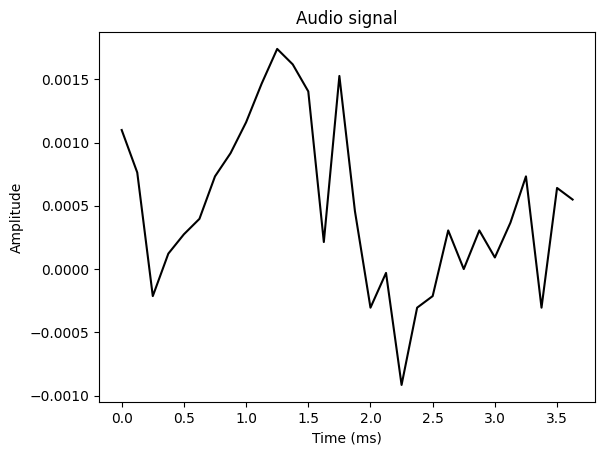

In [ ]:
audio=audio/2.**15
audio=audio[:30]
x_values = np.arange(0, len(audio), 1) / float(sampling_freq)
x_values *= 1000
plt.plot(x_values, audio, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Audio signal')
plt.show()

In [ ]:
transformed_signal = np.fft.fft(audio)

In [ ]:
transformed_signal = np.fft.fft(audio)
len_audio = len(audio) # Calculate the length of the audio array
half_length = np.ceil((len_audio + 1) / 2.0)
half_length=int(half_length)
transformed_signal = abs(transformed_signal[0:half_length])
transformed_signal **= 2

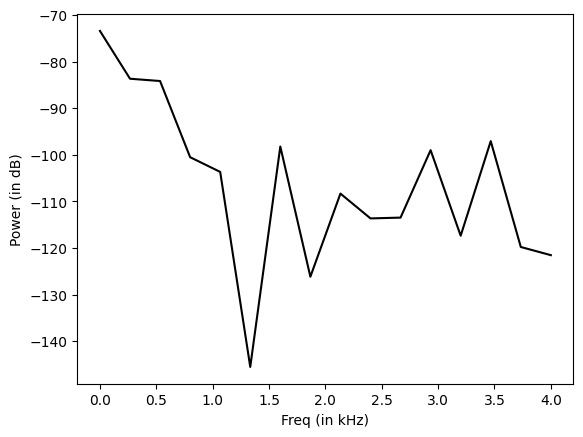

In [ ]:
power = 20 * np.log10(transformed_signal)
x_values = np.arange(0, half_length, 1) * (sampling_freq / len_audio) / 1000.0
plt.figure()
plt.plot(x_values, power, color='black')
plt.xlabel('Freq (in kHz)')
plt.ylabel('Power (in dB)')
plt.show()

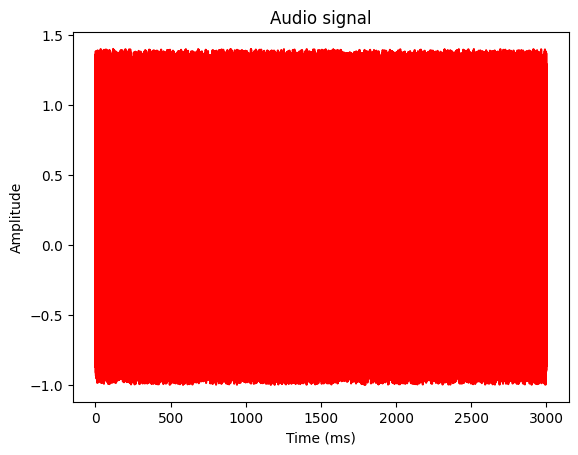

In [ ]:
duration = 3
sampling_freq = 44100
tone_freq = 587
min_val = -2 * np.pi
max_val = 2 * np.pi
t = np.linspace(min_val, max_val, duration * sampling_freq)
audio = np.sin(2 * np.pi * tone_freq * t)
noise = 0.4 * np.random.rand(duration * sampling_freq)
audio += noise
scaling_factor = pow(2,15) - 1
audio_normalized = audio / np.max(np.abs(audio))
audio_scaled = np.int16(audio_normalized * scaling_factor)
x_values = np.arange(0, len(audio), 1) / float(sampling_freq)
x_values *= 1000
plt.plot(x_values, audio, color='red')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Audio signal')
plt.show()

In [ ]:
!pip install scipy
import scipy.io.wavfile as wav

# Saving the generated Audio file
output_file = 'output_generated.wav'
wav.write(output_file, sampling_freq,audio_scaled) # Use wav.write to save the audio file

In [31]:
from librosa.feature import mfcc
import librosa
sampling_freq, audio = librosa.load("input_freq.wav")
mfcc_features = mfcc(sampling_freq,audio)
print("\nNumber of windows =", mfcc_features.shape[0])
print('Length of each feature =', mfcc_features.shape[1])

<ipython-input-31-9a04edb1f87c>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  sampling_freq, audio = librosa.load("input_freq.wav")
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'input_freq.wav'